# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [2]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [3]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [4]:
d.mean()

height    154.597093
weight     44.990486
age        41.138494
male        0.468750
dtype: float64

## Task 1. Prior predictive checks

In [5]:
model_ppc=CmdStanModel(stan_file='/home/lab4/height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

08:41:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


08:41:52 - cmdstanpy - INFO - CmdStan done processing.




1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

**Task 1**

In [6]:
ex1 = sim.draws_pd()
ex1

,lp__,accept_stat__,mi,sigma,height_sim
0,0.0,0.0,197.082,0.036112,196.124
1,0.0,0.0,157.277,0.032599,118.733
2,0.0,0.0,185.516,0.031398,180.071
3,0.0,0.0,177.435,0.060692,192.958
4,0.0,0.0,160.982,0.084699,160.650
...,...,...,...,...,...
995,0.0,0.0,169.013,0.215910,166.114
996,0.0,0.0,179.571,0.026717,168.196
997,0.0,0.0,176.307,0.019061,146.670
998,0.0,0.0,155.594,0.011512,162.889


In [7]:
mi_sim = ex1["mi"]
sigma_sim = ex1["sigma"]
height_sim = ex1["height_sim"]

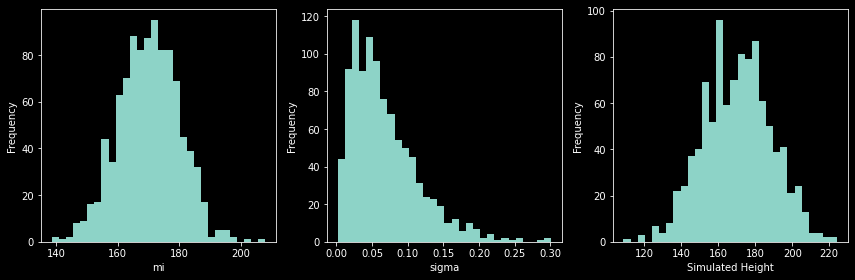

In [8]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
ax[0].hist(mi_sim, bins=30)
ax[0].set_xlabel("mi")
ax[0].set_ylabel("Frequency")
ax[1].hist(sigma_sim, bins=30)
ax[1].set_xlabel("sigma")
ax[1].set_ylabel("Frequency")
ax[2].hist(height_sim, bins=30)
ax[2].set_xlabel("Simulated Height")
ax[2].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

***Task 2***

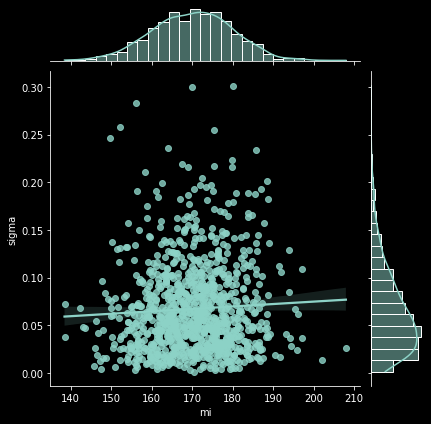

In [ ]:
sns.jointplot(x = "mi", y = "sigma",
              kind = "reg", data = ex1,
              dropna = True)
plt.xlabel("mi")
plt.ylabel("sigma")
plt.show()

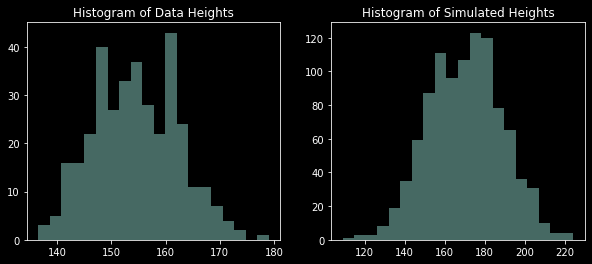

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(d.height.values, bins=20, alpha=0.5)
axs[0].set_title('Histogram of Data Heights')

axs[1].hist(height_sim, bins=20, alpha=0.5)
axs[1].set_title('Histogram of Simulated Heights')

plt.show()

In [ ]:
samples = fit.draws()

## Task 2. Model fit and evaluation

In [88]:
model_1_fit=CmdStanModel(stan_file='/home/lab4/height_1_fit.stan')

08:54:50 - cmdstanpy - INFO - compiling stan file /home/lab4/height_1_fit.stan to exe file /home/lab4/height_1_fit
08:55:08 - cmdstanpy - INFO - compiled model executable: /home/lab4/height_1_fit
08:55:08 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
08:55:08 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/height_1_fit.hpp /home/lab4/height_1_fit.stan
Warning in '/home/lab4/height_1_fit.stan', line 3, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_mat

In [89]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

08:55:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


08:55:08 - cmdstanpy - INFO - CmdStan done processing.
08:55:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/home/lab4/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/home/lab4/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/home/lab4/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/home/lab4/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/home/lab4/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/home/lab4/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location param

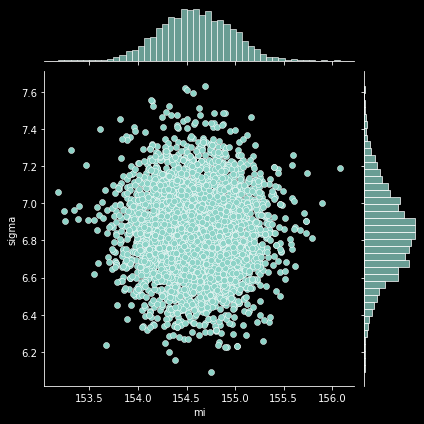

In [90]:
sns.jointplot(data=fit.draws_pd(), x="mi", y="sigma")

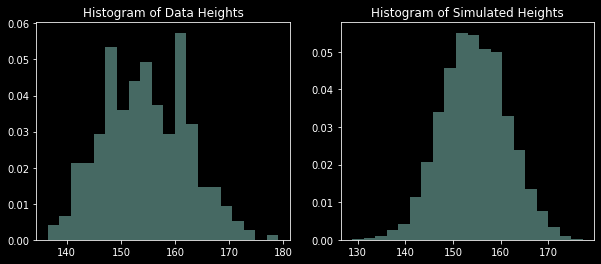

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(d.height.values, bins=20, density=True, alpha=0.5)
axs[0].set_title('Histogram of Data Heights')

axs[1].hist(fit.draws_pd()["height_sim"], bins=20, density=True, alpha=0.5)
axs[1].set_title('Histogram of Simulated Heights')

plt.show()


1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.


## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [99]:
d['c_weight'] = d['weight'] - d['weight'].mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}


## Task 4. Prior predictive checks
 

In [101]:
model_ppc=CmdStanModel(stan_file='/home/lab4/height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

08:58:25 - cmdstanpy - INFO - compiling stan file /home/lab4/height_2a_ppc.stan to exe file /home/lab4/height_2a_ppc
08:58:42 - cmdstanpy - INFO - compiled model executable: /home/lab4/height_2a_ppc
08:58:42 - cmdstanpy - WARNING - Stan compiler has produced 2 warnings:
08:58:42 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/height_2a_ppc.hpp /home/lab4/height_2a_ppc.stan
Warning in '/home/lab4/height_2a_ppc.stan', line 3, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab4/height_2a_ppc.stan', line 11, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically usi


08:58:42 - cmdstanpy - INFO - CmdStan done processing.


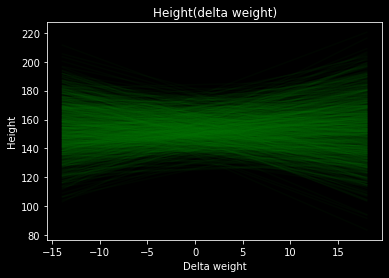

In [102]:
weight = np.linspace(d.c_weight.min(),d.c_weight.max(), R).reshape((R, 1))
h_hat = weight * sim.draws_pd()['beta'].values + sim.draws_pd()['alpha'].values
extended_domain = np.ones((1, R)) * weight
plt.plot(extended_domain, h_hat, 'g', alpha=0.05)
plt.title('Height(delta weight)')
plt.xlabel('Delta weight')
plt.ylabel('Height')
plt.show()

Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [103]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

09:00:54 - cmdstanpy - INFO - compiling stan file /home/lab4/height_2b_ppc.stan to exe file /home/lab4/height_2b_ppc
09:01:09 - cmdstanpy - INFO - compiled model executable: /home/lab4/height_2b_ppc
09:01:09 - cmdstanpy - WARNING - Stan compiler has produced 2 warnings:
09:01:09 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/height_2b_ppc.hpp /home/lab4/height_2b_ppc.stan
Warning in '/home/lab4/height_2b_ppc.stan', line 3, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab4/height_2b_ppc.stan', line 11, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically usi

In [104]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

09:01:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


09:01:20 - cmdstanpy - INFO - CmdStan done processing.


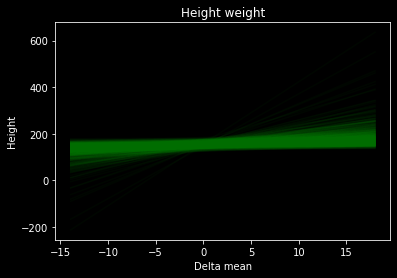

In [105]:
weight = np.linspace(d.c_weight.min(),d.c_weight.max(), R).reshape((R, 1))
h_hat = weight * sim.draws_pd()['beta'].values + sim.draws_pd()['alpha'].values
extended_domain = np.ones((1, R)) * weight
plt.plot(extended_domain, h_hat, 'g', alpha=0.05)
plt.title('Height weight')
plt.xlabel('Delta mean')
plt.ylabel('Height')
plt.show()

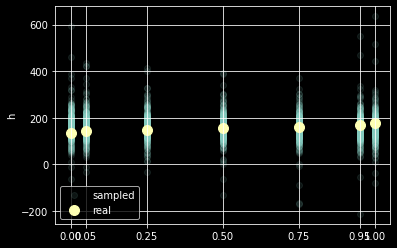

In [106]:
heights = sim.draws_pd().loc[:, 'height[1]':'height[50]'].values
quantiles = [.0, .05, .25, .5, .75, .95, 1.]



plt.scatter(quantiles * np.ones((1000, 1)), np.quantile(heights, quantiles, axis=1), alpha=0.1, label='sampled')
plt.scatter(quantiles, np.quantile(d.height, quantiles), s=100, label='real')
plt.xticks(quantiles)
plt.ylabel('h')
plt.grid()
plt.legend()
plt.show()

1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

## Task 6. Fitting and evaluating model


In [107]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

09:04:47 - cmdstanpy - INFO - compiling stan file /home/lab4/height_2_fit.stan to exe file /home/lab4/height_2_fit
09:05:04 - cmdstanpy - INFO - compiled model executable: /home/lab4/height_2_fit
09:05:04 - cmdstanpy - WARNING - Stan compiler has produced 4 warnings:
09:05:04 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/height_2_fit.hpp /home/lab4/height_2_fit.stan
Warning in '/home/lab4/height_2_fit.stan', line 3, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab4/height_2_fit.stan', line 4, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the a

1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


In [109]:
data_fit = dict(
      N=60,
      heights=d.height.values[:n],
      weight=d.c_weight.values[:n]
)

fit=model_2_fit.sample(data=data_fit,seed=28052020)


09:07:55 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


09:07:55 - cmdstanpy - INFO - CmdStan done processing.
09:07:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -1.95304, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.274691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -60.2651, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.012822, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.0466309, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
Exception: lognormal_lpdf: Random variable is -27.7763, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23,

2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


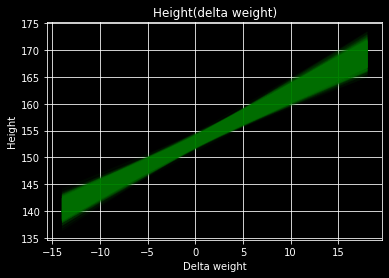

In [110]:
weight = np.linspace(d.c_weight.min(),d.c_weight.max(), 1000).reshape((-1, 1))

plt.plot(
    np.ones((1, 4000)) * weight, 
    weight * fit.draws_pd()['beta'].values + fit.draws_pd()['alpha'].values, 
    'g', 
    alpha=0.05
    )
plt.title('Height(delta weight)')
plt.xlabel('Delta weight')
plt.ylabel('Height')
plt.grid()
plt.show()

09:09:29 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


09:09:30 - cmdstanpy - INFO - CmdStan done processing.
09:09:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -1.95304, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.274691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.0211354, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -2.39172, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.221927, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.00704668, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line

09:09:32 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


09:09:32 - cmdstanpy - INFO - CmdStan done processing.
09:09:32 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -1.95304, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.274691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -40.0467, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -40.2676, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -9.37359, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -1.78368, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, c

09:09:34 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


09:09:35 - cmdstanpy - INFO - CmdStan done processing.
09:09:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -1.95304, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.274691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.268521, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -1.68652, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -1.50884, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
Exception: lognormal_lpdf: Random variable is -0.0672691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23,

09:09:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


09:09:37 - cmdstanpy - INFO - CmdStan done processing.
09:09:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -1.95304, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.274691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -36.7041, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -36.925, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -8.53796, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -1.57477, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, co

09:09:39 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


09:09:40 - cmdstanpy - INFO - CmdStan done processing.
09:09:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -1.95304, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.274691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -11.8189, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -12.0398, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -2.31665, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.0194457, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23,

09:09:43 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

09:09:43 - cmdstanpy - INFO - CmdStan done processing.
09:09:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -1.95304, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.274691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.0183911, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -1.56922, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -5.8102, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -1.79793, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, c

09:09:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


09:09:47 - cmdstanpy - INFO - CmdStan done processing.
09:09:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -1.95304, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.274691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
Exception: lognormal_lpdf: Random variable is -10.7015, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
Exception: lognormal_lpdf: Random variable is -0.0672691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -4.21178, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -1.9771, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, co

09:09:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)



chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


09:09:51 - cmdstanpy - INFO - CmdStan done processing.
09:09:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -1.95304, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.274691, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.00245974, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -1.0823, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
Exception: lognormal_lpdf: Random variable is -29.2274, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23, column 3 to column 25)
	Exception: lognormal_lpdf: Random variable is -0.918192, but must be nonnegative! (in '/home/lab4/height_2_fit.stan', line 23,

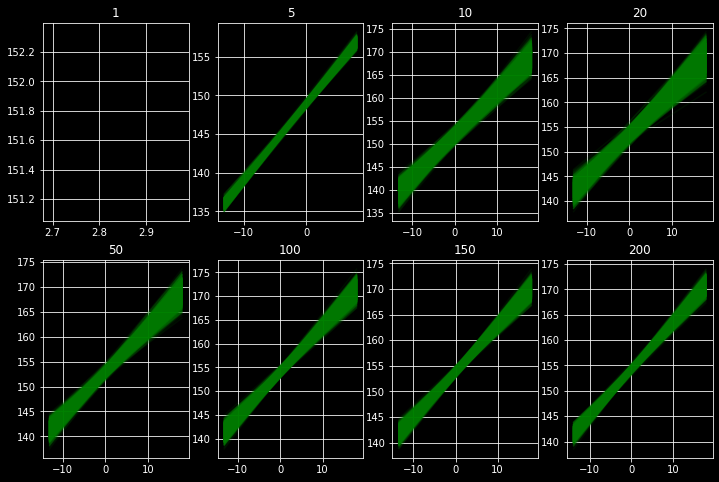

In [111]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.flatten()
idx = 0
ns = [1, 5, 10, 20, 50, 100, 150, 200]
for n in ns:
    data_fit = dict(
      N=n,
      heights=d.height.values[:n],
      weight=d.c_weight.values[:n]
    )
    fit=model_2_fit.sample(data=data_fit,seed=28052020)

    
    domain = np.linspace(data_fit['weight'].min(), data_fit['weight'].max(), n).reshape((n, 1))

    axes[idx].plot(
        np.ones((1, 4000)) * domain, 
        fit.draws_pd()['beta'].values * domain + fit.draws_pd()['alpha'].values, 
        'g', 
        alpha=0.1
        )
    
    axes[idx].set_title(f'{n}')
    axes[idx].grid()
    idx+=1
plt.show()

## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 